In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df= pd.read_csv('../input/vehicle-dataset-from-cardekho/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
# TOTAL NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN

for feature in df.columns:
    print(feature,len(df[feature].unique()))

Car_Name 98
Year 16
Selling_Price 156
Present_Price 147
Kms_Driven 206
Fuel_Type 3
Seller_Type 2
Transmission 2
Owner 3


In [3]:
# Getting the age of car

df['Year']=2020-df['Year']

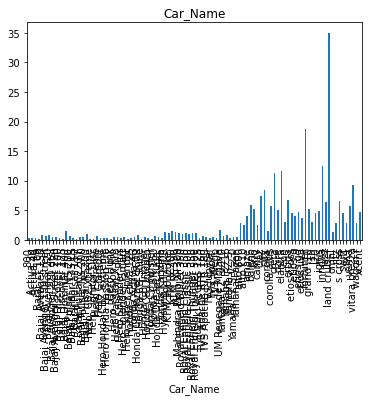

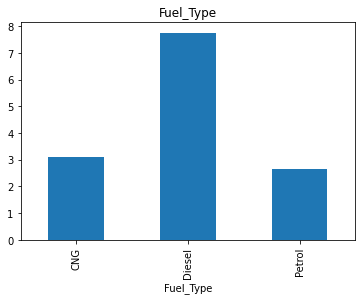

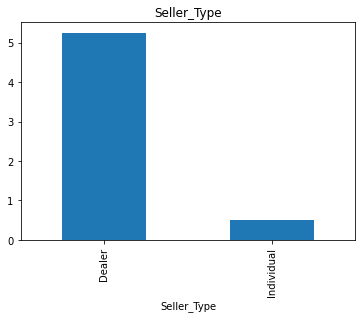

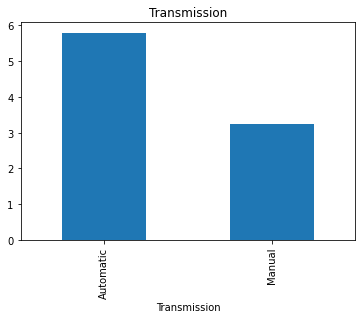

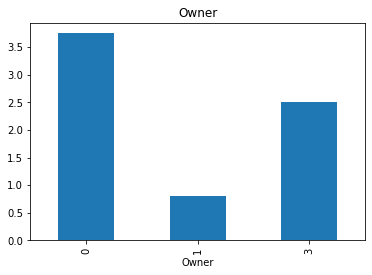

In [4]:
# relationship between categorical features and SalePrice
for feature in ['Car_Name','Fuel_Type','Seller_Type','Transmission','Owner']:
    data = df.copy()
    data.groupby(feature)['Selling_Price'].median().plot.bar()
    plt.title(feature)
    plt.show()

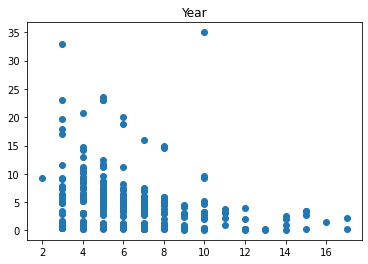

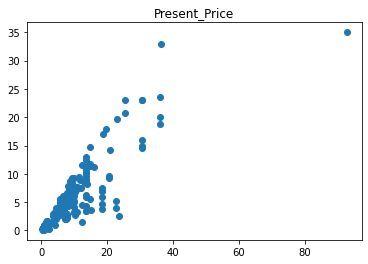

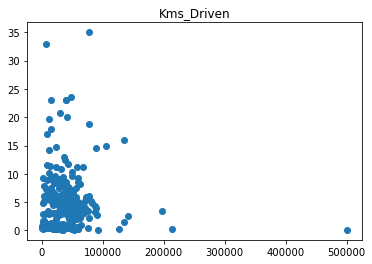

In [5]:
# relationship between numeric features and SalePrice
for feature in ['Year', 'Present_Price', 'Kms_Driven' ]:
    data = df.copy()
    plt.scatter(df[feature],df['Selling_Price'])
    plt.title(feature)
    plt.show()

In [6]:
# As Car_name has way too many features we will drop that column for now, and convert all categorical features into OneHotEncoded 
final_dataset = pd.get_dummies(df.drop(['Car_Name'],axis=1),drop_first=True)

In [8]:
# rearranging columns
final_dataset=final_dataset[['Year',  'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual','Selling_Price']]
final_dataset.head(4)

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,6,5.59,27000,0,0,1,0,1,3.35
1,7,9.54,43000,0,1,0,0,1,4.75
2,3,9.85,6900,0,0,1,0,1,7.25
3,9,4.15,5200,0,0,1,0,1,2.85


In [9]:
#independent and dependant features
x=final_dataset.iloc[:,:-1]
y=final_dataset.iloc[:,-1]

[0.07393511 0.39722907 0.04208314 0.0017339  0.21373142 0.01432725
 0.11977656 0.13718354]


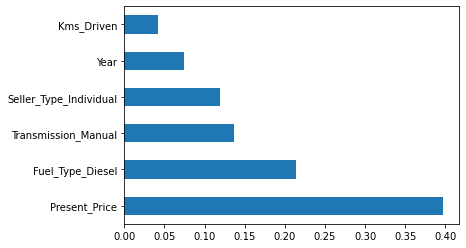

In [11]:
### feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index = x.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

**Train Test Split**

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Grid Search For XG-Boost

In [14]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


xgb_model=xgb.XGBRegressor()
Grid_search = GridSearchCV(xgb_model,
                   {'max_depth': [ 6,8,10],
                    'n_estimators': [70,80,90,100,110,120]}, verbose=1)

# Fitting the model
Grid_search.fit(X_train,y_train)

print(Grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 6, 'n_estimators': 70}


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.4s finished


In [15]:
model=xgb.XGBRegressor(max_depth=6,n_estimators=70)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=70, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

MSE: 0.5633829318109105


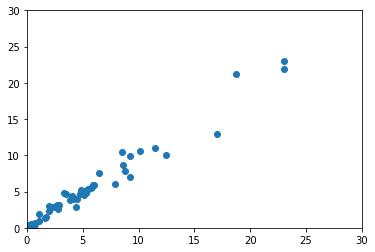

In [16]:
prediction=model.predict(X_test)

plt.scatter(y_test,prediction)
axes = plt.gca()
axes.set_xlim([0,30])
axes.set_ylim([0,30])

from sklearn import metrics
print('MSE:', metrics.mean_absolute_error(y_test, prediction))

# Randomized Search CV for Random forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators=[int(X) for X in np.linspace(start = 100, stop = 1100 , num =11)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(X) for X in np.linspace(6,20,num =4)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split =[2,5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [18]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100], 'max_features': ['auto', 'sqrt'], 'max_depth': [6, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [19]:
rf = RandomForestRegressor()

model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.0s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.0s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.1s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.0s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.0s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, total=   1.8s
[CV] n_estimators=800, min_samples_split=10

[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.3s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.4s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.3s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.4s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.4s
[CV] n_estimators=100, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [20]:
model.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 20}

MSE: 0.5633829318109105


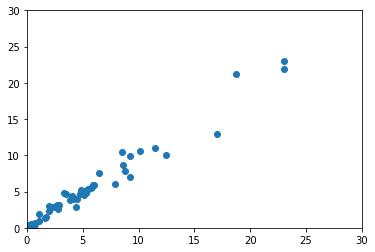

In [25]:
model.predict(X_test)

plt.scatter(y_test,prediction)
axes = plt.gca()
axes.set_xlim([0,30])
axes.set_ylim([0,30])

from sklearn import metrics
print('MSE:', metrics.mean_absolute_error(y_test, prediction))